
## <span style="color:blue"> Problem Statement:  
Performing Logistic Regression model on Framingham Heart Disease dataset to classify and check the chances of 'males' getting a 'heart disease' in 'ten years' using the related factor.

### Importing the necessary libraries and importing the dataset

In [75]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
print(os.getcwd())
os.chdir('E:\\Data Science _TR\\Python\\') # Choose your directory
print(os.getcwd())

E:\Data Science _TR\Python
E:\Data Science _TR\Python


In [79]:
data = pd.read_csv('framingham.csv')
data.sample(5)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4199,0,61,1.0,0,0.0,0.0,0,0,0,271.0,133.0,83.0,25.31,90.0,60.0,1
1432,0,51,2.0,0,0.0,0.0,0,0,0,239.0,127.5,77.5,26.65,70.0,79.0,0
3741,1,60,3.0,0,0.0,0.0,1,1,0,203.0,140.0,95.0,28.04,60.0,83.0,0
642,0,40,2.0,0,0.0,0.0,0,0,0,230.0,123.5,81.0,27.91,95.0,65.0,0
1626,1,41,2.0,0,0.0,0.0,0,0,0,247.0,104.0,73.0,23.70,68.0,68.0,0


In [82]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [83]:
data.male.value_counts()

0    2420
1    1820
Name: male, dtype: int64

In [84]:
# Dimensions of your datset
data.shape

(4240, 16)

In [85]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [ ]:
data.head()

### Data Visualization

array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

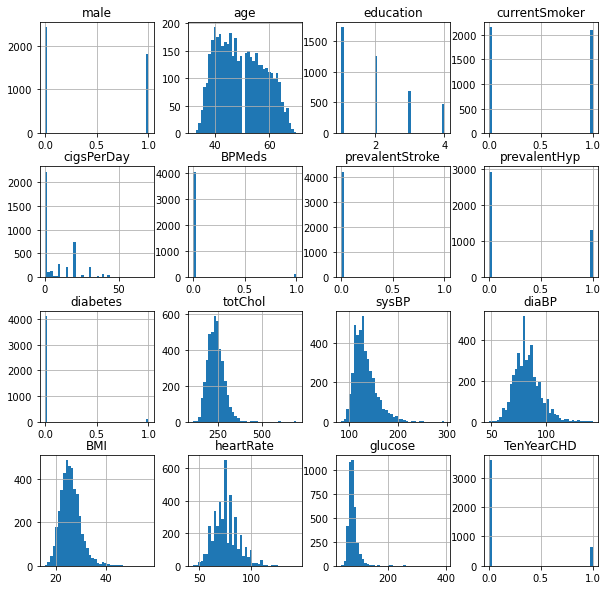

In [86]:
data.hist(bins=40, figsize=(10,10)) #histogram

### Correlation of the attributes

In [87]:
data.corr() # Correlation functino

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


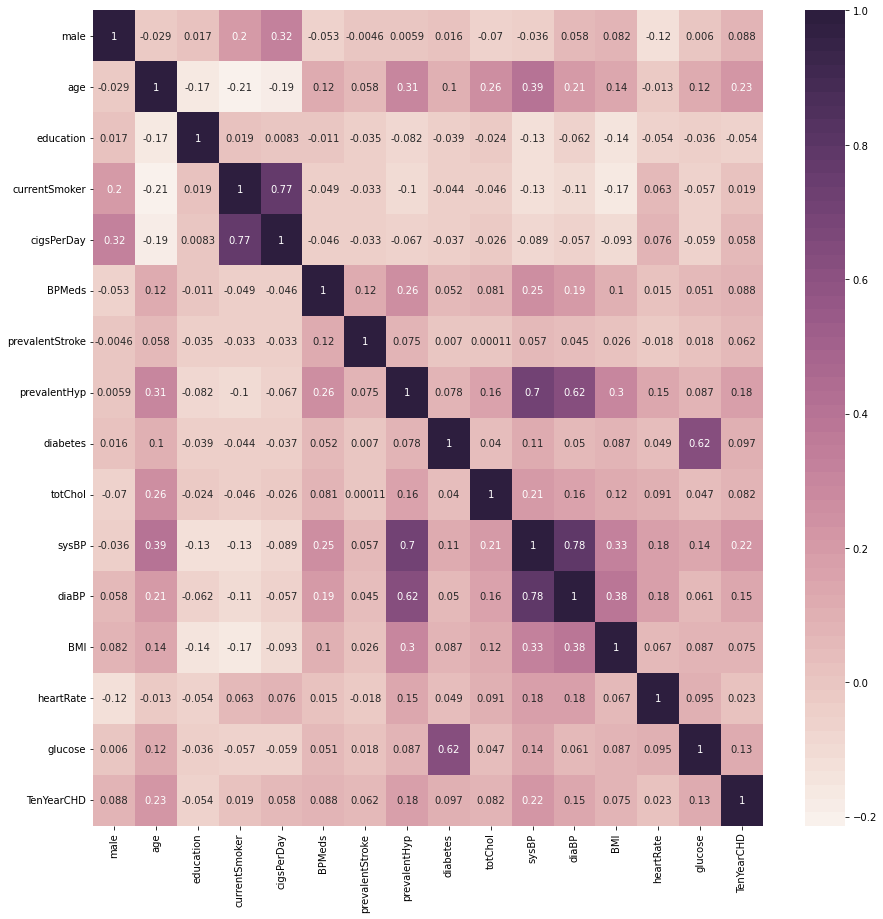

In [88]:
plt.figure(figsize=(15,15))
datacorr=sns.heatmap(data.corr(),cmap=sns.cubehelix_palette(60,light=0.95,dark=0.15),annot=True)

In [89]:
data.isnull().sum() #Checking if any null value present

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [90]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
data.tail() # Bottom 5 records

In [91]:
data.isnull().sum() # Check if any null value present

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [92]:
data = data.dropna() # Remove the null values row
data.isnull().sum() # Check if any null value present

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [93]:
data.shape #Check the rowsxcolumns(dimesnions) of your dataset shape

(3658, 16)

In [ ]:
data.dtypes #Checking the data types of your datset


In [94]:
# Transforming the data types of following columns
data['cigsPerDay'] = data['cigsPerDay'].astype(dtype='int64')
data['BPMeds'] = data['BPMeds'].astype(dtype='int64')
data['totChol'] = data['totChol'].astype(dtype='int64')
data['heartRate'] = data['heartRate'].astype(dtype='int64')
data['glucose'] = data['glucose'].astype(dtype='int64')



C:\Users\HP\AppData\Local\Temp/ipykernel_11080/951774241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cigsPerDay'] = data['cigsPerDay'].astype(dtype='int64')
C:\Users\HP\AppData\Local\Temp/ipykernel_11080/951774241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BPMeds'] = data['BPMeds'].astype(dtype='int64')
C:\Users\HP\AppData\Local\Temp/ipykernel_11080/951774241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [95]:
#Re checking the changed data types
data.dtypes 

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay           int64
BPMeds               int64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol              int64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose              int64
TenYearCHD           int64
dtype: object

In [96]:
X = data.iloc[:,0:-1] # All columns except last one as X  -independent variable
y = data.iloc[:,-1]   # Only last column as y             -dependent variable tenheartdisease

In [97]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77
1,0,46,2.0,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76
2,1,48,1.0,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70
3,0,61,3.0,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103
4,0,46,3.0,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86
4234,1,51,3.0,1,43,0,0,0,0,207,126.5,80.0,19.71,65,68
4237,0,52,2.0,0,0,0,0,0,0,269,133.5,83.0,21.47,80,107
4238,1,40,3.0,0,0,0,0,1,0,185,141.0,98.0,25.60,67,72


In [98]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 3658, dtype: int64

# Model Building

In [99]:
#Importing library for training and testing the model

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=1) #splitting the data as train and test


In [100]:
X_train.shape #------------70 % data --2560

(2560, 15)

In [101]:
X_test.shape #------------ 30% data----1098

(1098, 15)

In [102]:
# Importing library for performing logistic regression
from sklearn.linear_model import LogisticRegression

l_reg = LogisticRegression() # Making a logistic regression model
l_reg.fit(X_train,y_train)   # Fitting the data

C:\Users\HP\DS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
y_pred = l_reg.predict(X_test) # Predict the X_test data ---1098 records



In [105]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred) # calculate the accuracy

0.848816029143898

In [106]:
#library for validating the model
from sklearn.metrics import confusion_matrix, classification_report

In [107]:
metrics.confusion_matrix(y_test,y_pred) #confusion matrix

array([[925,   6],
       [160,   7]], dtype=int64)

In [108]:
target_names = ['class 0', 'class 1']

In [109]:
print(metrics.classification_report(y_test,y_pred,target_names=target_names)) #classification report

              precision    recall  f1-score   support

     class 0       0.85      0.99      0.92       931
     class 1       0.54      0.04      0.08       167

    accuracy                           0.85      1098
   macro avg       0.70      0.52      0.50      1098
weighted avg       0.80      0.85      0.79      1098



In [ ]:
metrics.precision_score(y_test, y_pred)

## Final Conclusion: The logistic regression here is a good model as the accuracy shows 85%.  

###### 
true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.

true negatives (TN): We predicted no, and they don't have the disease.

false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")

false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")




###### 
[925,   6],

[160,   7]]

In [110]:
(1235 + 9)/ (1235 + 7 + 9 + 213)

0.8497267759562842

###### Accuracy Score
-----
(TP + TN)/ (TP + FN + TN + FP)


In [ ]:
(925 + 7)/ (925 + 7 + 6 + 160)

###### Precision Score
---
TP / (FP + TP)



In [111]:
925 /(160+925)

0.8525345622119815

###### Recall Score 

TP / (FN + TP)



In [112]:
925 /(7+925)

0.9924892703862661

###### F1 Score 
---
2* Precision Score * Recall Score/ (Precision Score + Recall Score)

In [113]:
2*((0.8525345622119815)*(0.9943639291465378)/(0.8525345622119815+0.9924892703862661))

0.9189362240600628